In [97]:
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import re
import math
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Authentication Keys 

In [0]:
consumer_key = 'your own key'
consumer_secret = 'your own secret'
access_token = 'your own access token'
access_token_secret = 'your own access_token'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

##Input Data from User

In [99]:
user=input("Enter your searchterm #anything:")

Enter your searchterm #anything:#COVID19


In [100]:
api = tweepy.API(auth)
posts=api.search(user,count="1000",lang="en",tweet_mode="extended")
 
i = 1;
for tweet in posts[0:5]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i = i + 1
 
#Create a dataframe for tweets
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

1)RT @Omkar_Raii: As #COVID19 continues to disrupt industries across sectors, the Indian IT companies are investing in emerging technologies…

2)RT @healthy_climate: Prime Minister Scott Morrison himself has said that what we do now will affect us for decades to come — that’s why his…

3)Very true #COVID19 #karachi #JummahMubarak https://t.co/TWdZNtUFDF

4)RT @VasundharaBJP: Did you know? 

Worldwide almost one in ten of all children are in child labour and this #Covid19 pandemic is going to p…

5)RT @stpiindia: Make this Acrylic Protector as a cost-effective &amp; reusable method of letting your customers &amp; employees know you care for th…



,Tweets
0,RT @Omkar_Raii: As #COVID19 continues to disru...
1,RT @healthy_climate: Prime Minister Scott Morr...
2,Very true #COVID19 #karachi #JummahMubarak htt...
3,RT @VasundharaBJP: Did you know? \n\nWorldwide...
4,RT @stpiindia: Make this Acrylic Protector as ...


##Data Preprocessing

In [101]:
#Data Cleaning
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text) #Remove @usernames
  text=re.sub(r'#','',text) #Remove hashtags
  text=re.sub(r'RT[\s]+','',text) #Remove Retweets
  text=re.sub(r'https?:\/\/\S+','',text) #Remove links to webpages
  return text
 
df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,_Raii: As COVID19 continues to disrupt industr...
1,_climate: Prime Minister Scott Morrison himsel...
2,Very true COVID19 karachi JummahMubarak
3,: Did you know? \n\nWorldwide almost one in te...
4,: Make this Acrylic Protector as a cost-effect...
5,_HRC: “Looking at the broader social response ...
6,: Startups can thrive during post COVID19 pand...
7,_amit: Poor financial condition due to COVID19...
8,: 🇸🇪 is proud to support ECOSOC HAS2020 Call t...
9,: TamilNadu Health secretary BeelaRajesh has b...


##Finding number of words in each tweet

In [102]:
#Getting number of words in a tweet
def getwordfreq(text):
  k=TextBlob(text).words
  return len(k)

df['Number of words in Tweet']=df['Tweets'].apply(getwordfreq)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df



,Tweets,Number of words in Tweet
0,_Raii: As COVID19 continues to disrupt industr...,18
1,_climate: Prime Minister Scott Morrison himsel...,26
2,Very true COVID19 karachi JummahMubarak,5
3,: Did you know? \n\nWorldwide almost one in te...,23
4,: Make this Acrylic Protector as a cost-effect...,21
5,_HRC: “Looking at the broader social response ...,22
6,: Startups can thrive during post COVID19 pand...,16
7,_amit: Poor financial condition due to COVID19...,22
8,: 🇸🇪 is proud to support ECOSOC HAS2020 Call t...,22
9,: TamilNadu Health secretary BeelaRajesh has b...,15


##Calculate Average Length of Tweets

In [103]:
#Calculating Average Length of Tweets
i=0
netlth=0
avg_length_of_tweets=0
for i in range(df.shape[0]):
  netlth=netlth+df['Number of words in Tweet'][i]

avg_length_of_tweets=netlth/df.shape[0]
print('Average Length of Tweet:',end="")
print(math.trunc(avg_length_of_tweets),end="")
print(" words")



Average Length of Tweet:22 words


##Let's Analyse

In [0]:
# Now, it's time for Analysis
#A method for subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Method to get polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity



In [105]:
#Applying the methods in dataframe
df['Subjectivity']=df['Tweets'].apply(getsubjectivity)
df['Polarity']=df['Tweets'].apply(getpolarity) 
df

,Tweets,Number of words in Tweet,Subjectivity,Polarity
0,_Raii: As COVID19 continues to disrupt industr...,18,0.000000,0.000000
1,_climate: Prime Minister Scott Morrison himsel...,26,0.000000,0.000000
2,Very true COVID19 karachi JummahMubarak,5,0.845000,0.455000
3,: Did you know? \n\nWorldwide almost one in te...,23,0.000000,0.000000
4,: Make this Acrylic Protector as a cost-effect...,21,0.000000,0.000000
5,_HRC: “Looking at the broader social response ...,22,0.591667,0.283333
6,: Startups can thrive during post COVID19 pand...,16,0.000000,0.000000
7,_amit: Poor financial condition due to COVID19...,22,0.325000,-0.175000
8,: 🇸🇪 is proud to support ECOSOC HAS2020 Call t...,22,0.550000,0.450000
9,: TamilNadu Health secretary BeelaRajesh has b...,15,0.454545,0.136364


In [0]:
def getAnalysis(points):
  if points<0:
    return"Negative"
  elif points==0:
    return "Neutral"
  else:
    return "Positive"

In [107]:
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Number of words in Tweet,Subjectivity,Polarity,Analysis
0,_Raii: As COVID19 continues to disrupt industr...,18,0.000000,0.000000,Neutral
1,_climate: Prime Minister Scott Morrison himsel...,26,0.000000,0.000000,Neutral
2,Very true COVID19 karachi JummahMubarak,5,0.845000,0.455000,Positive
3,: Did you know? \n\nWorldwide almost one in te...,23,0.000000,0.000000,Neutral
4,: Make this Acrylic Protector as a cost-effect...,21,0.000000,0.000000,Neutral
5,_HRC: “Looking at the broader social response ...,22,0.591667,0.283333,Positive
6,: Startups can thrive during post COVID19 pand...,16,0.000000,0.000000,Neutral
7,_amit: Poor financial condition due to COVID19...,22,0.325000,-0.175000,Negative
8,: 🇸🇪 is proud to support ECOSOC HAS2020 Call t...,22,0.550000,0.450000,Positive
9,: TamilNadu Health secretary BeelaRajesh has b...,15,0.454545,0.136364,Positive


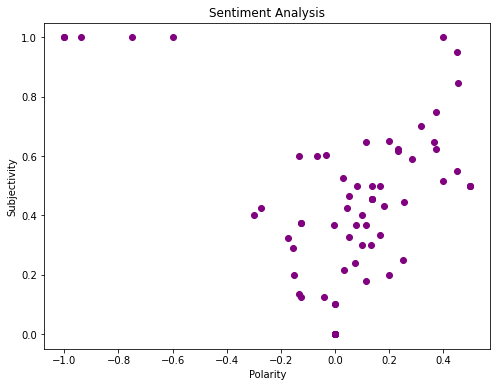

In [108]:
#plot polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  #This takes the corresponding values of polarity and subjectivity
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Purple')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel("Subjectivity")
plt.show()

##Displaying Positive, Negative and Neutral Tweets

In [109]:
#Displaying all positive tweets
print("Check out the positive tweets by:"+user);
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, df.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j=j+1

Check out the positive tweets by:#COVID19
1)Very true COVID19 karachi JummahMubarak 

2)_HRC: “Looking at the broader social response will not only make COVID19 measures fairer, but also more efficient, effective and tra…

3): 🇸🇪 is proud to support ECOSOC HAS2020 Call to Action on the humanitarian response to COVID19.

We will continue to push fo…

4): TamilNadu Health secretary BeelaRajesh has been transferred. JRadhakrishnan has been appointed as new Health secret…

5): COVID19 Negativity rate in testing 99.2%. 27 people in ICU, down 88% on peak. 79 hospitalised confirmed cases, down 91…

6): India reports the highest single-day spike of 10,956 new COVID19 cases &amp; 396 deaths in the last 24 hours. Total number of cases i…

7)_in: In 5 of the most populous states with 46% of COVID19 cases, &gt;20% of rural households in 4 states access drinking water…

8): New Coronavirus cases today

Germany: 37
Austria: 29
Denmark: 19
Norway: 6
Finland: 24
Switzerland: 33

UK: 1,266

How…

9)_pe

In [110]:
#Displaying all negative tweets
print("Check out the negative tweets by:"+user);
j=1
sortedDF=df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, df.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j=j+1

Check out the negative tweets by:#COVID19
1)_amit: Poor financial condition due to COVID19 can force million to send their children to work instead of school. It's everyon…

2): Media is playing a negative role in fight against COVID19 
Please listen to Dr. Trivedi and spread positivity. 

3)USA surpasses grim milestone of 2 million Covid-19 cases

COVID19


4): JonRappoport breaks down story of whistleblower nurse, ErinMarieOlszewski, who exposed Covid19 patients being purpose…

5): BEFORE YOU EAT AT A RESTAURANT, WATCH THIS:
THIS IS A MUST-SEE &amp; MUST SHARE VIDEO:

This shocking experiment shows how quickl…

6)READ | Victoria's already strained justice system is now facing even lengthier delays due to COVID-19.  speaks with Melbourne-based lawyer Glenn Cooper about how our justice system is responding to these delays.

COVID19 justice law 



7): We DID IT &amp; now 4 in world-tally for Covid19 cases. We have gotten past Spain/UK today. 
Next Target is Russia/Brazil.…

8): Where a

In [111]:
#Displaying neutral Tweets
print("Check out the neutral tweets by:"+user);
j=1
for i in range(0, df.shape[0]):
  if(df['Analysis'][i]=='Neutral'):
    print(str(j)+')'+df['Tweets'][i])
    print()
    j=j+1

Check out the neutral tweets by:#COVID19
1)_Raii: As COVID19 continues to disrupt industries across sectors, the Indian IT companies are investing in emerging technologies…

2)_climate: Prime Minister Scott Morrison himself has said that what we do now will affect us for decades to come — that’s why his…

3): Did you know? 

Worldwide almost one in ten of all children are in child labour and this Covid19 pandemic is going to p…

4): Make this Acrylic Protector as a cost-effective &amp; reusable method of letting your customers &amp; employees know you care for th…

5): Startups can thrive during post COVID19 pandemic by rapidly recovering revenue, rebuilding operations, rethinking about th…

6): World's 4 countries with highest number of COVID19 cases at present are headed by 4 Fascists!
1. USA - Trump
2. Brazil - Bol…

7)_CGIAR: Remedies to faltering foodsystems must also target the climate emergency, stresses   in a  feature story…

8): When it adds up. 40 million Americans are unemp

In [137]:
#Displaying tweet classification directly
print("No. of tweets")
df['Analysis'].value_counts()

No. of tweets


Neutral     41
Positive    40
Negative    19
Name: Analysis, dtype: int64

##Classifying tweets and Visualisation

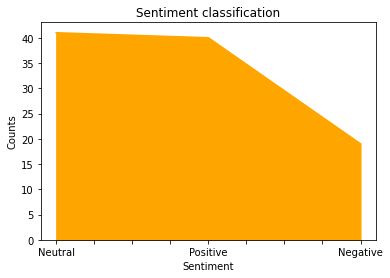

In [113]:
plt.title("Sentiment classification")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind="area",color="orange")
plt.show()

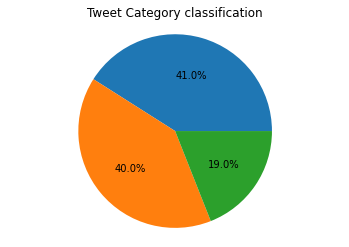

Neutral     41.0
Positive    40.0
Negative    19.0
Name: Analysis, dtype: float64

In [136]:
#my_labels = 'Positive tweets','Neutral; tweets','Negative tweets'
plt.pie(df['Analysis'].value_counts(),autopct='%1.1f%%')
plt.title('Tweet Category classification')
plt.axis('equal')
plt.show()

df['Analysis'].value_counts()*100/df.shape[0]
